<a href="https://colab.research.google.com/github/AI-Front/NTI/blob/main/QA_baseline_format_live_stuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Базовое решение 

Профиль "Искусственный интеллект" 2020

Олимпиады Кружкового движения НТИ и Академии искусственного интеллекта для школьников

### Загрузим данные

Тренировочные и валидационные данные, а также этот ноутбук лежат в [репозитории](https://github.com/AI-Front/NTI) 

In [1]:
!wget https://raw.githubusercontent.com/AI-Front/NTI/main/semifinals/data/train.jsonl

--2020-12-17 13:09:28--  https://raw.githubusercontent.com/AI-Front/NTI/main/semifinals/data/train.jsonl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2930172 (2.8M) [text/plain]
Saving to: ‘train.jsonl’

train.jsonl         100%[===================>]   2.79M  --.-KB/s    in 0.1s    

2020-12-17 13:09:28 (22.5 MB/s) - ‘train.jsonl’ saved [2930172/2930172]



In [2]:
!wget  https://raw.githubusercontent.com/AI-Front/NTI/main/semifinals/data/val.jsonl

--2020-12-17 13:09:28--  https://raw.githubusercontent.com/AI-Front/NTI/main/semifinals/data/val.jsonl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 566932 (554K) [text/plain]
Saving to: ‘val.jsonl’

val.jsonl           100%[===================>] 553.64K  --.-KB/s    in 0.04s   

2020-12-17 13:09:29 (13.0 MB/s) - ‘val.jsonl’ saved [566932/566932]



In [3]:
!wget  https://raw.githubusercontent.com/AI-Front/NTI/main/semifinals/data/test.jsonl

--2020-12-17 13:09:29--  https://raw.githubusercontent.com/AI-Front/NTI/main/semifinals/data/test.jsonl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1739290 (1.7M) [text/plain]
Saving to: ‘test.jsonl’

test.jsonl          100%[===================>]   1.66M  --.-KB/s    in 0.08s   

2020-12-17 13:09:29 (20.3 MB/s) - ‘test.jsonl’ saved [1739290/1739290]



## Формат данных

Мы имеем дело с jsonl - JSON Lines format



```
{"idx": 0, "passage": {"text": "(1) Самый первый «остров» Архипелага возник в 1923 году на месте Соловецкого монастыря. (2) Затем появились ТОНы — тюрьмы особого назначения и этапы. (3) Люди попадали на Архипелаг разными способами: в вагон-заках, на баржах, пароходах и пешими этапами. (4) В тюрьмы арестованных доставляли в «воронках» — фургончиках чёрного цвета. (5) Роль портов Архипелага играли пересылки, временные лагеря, состоящие из палаток, землянок, бараков или участков земли под открытым небом. (6) На всех пересылках держать «политических» в узде помогали специально отобранные урки, или «социально близкие». (7) Солженицын побывал на пересылке Красная Пресня в 1945 году. (8) Эмигранты, крестьяне и «малые народы» перевозили красными эшелонами. (9) Чаще всего такие эшелоны останав­ливались на пустом месте, посреди степи или тайги, и осуждённые сами строили лагерь. (10) Особо важные заключённые, в основном учёные, перевозились спецконвоем. (11) Так перевозили и Солженицына. (12) Он назвался ядерным физиком, и после Красной Пресни его перевезли в Бутырки.",
 "questions":
  [{"question": "Почему Солженицына перевозили спецконвоем?", 
  "answers":
      [{"idx": 0, 
      "text": "Так перевозили особо важных заключенных.", 
      "label": 1}, 
      {"idx": 1, 
      "text": "Потому, что был эмигрантом.", 
      "label": 0}, 
      {"idx": 2, 
      "text": "Потому, что он сам вырыл себе землянку.", 
      "label": 0}, 
      {"idx": 3, 
      "text": "Потому, что он побывал на пересылке Красная Пресня в 1945 году.", 
      "label": 0}, 
      {"idx": 4, 
      "text": "Потому, что он был особо важным заключённым и назвался ядерным физиком.", 
      "label": 1}], 
    "idx": 0}, 
  {"question": "Как люди попадали в тюрьмы особого типа на Соловках?", 
  "answers": 
      [{"idx": 5, 
      "text": "Люди попадали на архипелаг с помощью дрезин и вертолётов.", 
      "label": 0}, 
      {"idx": 6, 
      "text": "Люди попадали на Архипелаг разными способами: в вагон-заках, на баржах, пароходах, пешими этапами, а также спецконвоем.", 
      "label": 1}, 
      {"idx": 7, 
      "text": "Люди попадали на архипелаг с помощью специально отобранных пони.", 
      "label": 0}, 
      {"idx": 8, 
      "text": "Люди попадали на Соловки с помощью вертолётов и дрезин.", 
      "label": 0}, 
      {"idx": 9, 
      "text": "Люди попадали на Соловки с помощью вагон-заков, барж, пароходов, спецконвоев или пешком.", 
      "label": 1}], 
      "idx": 1}]}}

```




## Как записывать jsonlines ?


In [4]:
!pip install jsonlines

In [ ]:
import jsonlines

items = [] 

#дальше в этот список записываете словарики с ответами


with jsonlines.open('output.jsonl', 'w') as writer:
    writer.write_all(items)

## Как сделать и скачать файл сабмита?

In [5]:
# берем тестовый файл
import json

with open('test.jsonl', 'r') as json_file:
        json_list = list(json_file)

In [6]:
json_list[0]

'{"idx": 0, "passage": {"text": "\\"(1) Издательство Viking Press совместно с компанией TradeMobile выпустят мобильное приложение, посвященное Анне Франк, передает The Daily Telegraph. (2) Программа будет включать в себя фрагменты из дневника Анны, озвученные британской актрисой Хеленой Бонэм Картер. (3) Помимо этого, в приложение войдут фотографии и видеозаписи, документы из архива Фонда Анны Франк, план здания в Амстердаме, где Анна с семьей скрывались от нацистов, и факсимильные копии страниц дневника. (4) Приложение, которое получит название Anne Frank App, выйдет 18 октября. (5) Интерфейс программы будет англоязычным. (6) На каких платформах будет доступно Anne Frank App, не уточняется. Анна Франк родилась в Германии в 1929 году. (7) Когда в стране начались гонения на евреев, Анна с семьей перебрались в Нидерланды. (8) С 1942 года члены семьи Франк и еще несколько человек скрывались от нацистов в потайных комнатах дома в Амстердаме, который занимала компания отца Анны. (9) В 1944 

In [7]:
json.loads(json_list[0])

{'idx': 0,
 'passage': {'questions': [{'answers': [{'idx': 0,
      'text': 'Дневник об отметках Анны.'},
     {'idx': 1, 'text': 'Дневник о школьных годах девочки Анны.'},
     {'idx': 2,
      'text': 'О жизни еврейской девочки во время гонения евреев нацистами.'},
     {'idx': 3,
      'text': 'Анна описывала свою жизнь и жизнь близких, когда скрывалась от нацистов.'}],
    'idx': 0,
    'question': 'О чем дневник Анны Франк?'},
   {'answers': [{'idx': 4, 'text': 'Приложение будет платным.'},
     {'idx': 5, 'text': 'Приложение будет англоязычным.'},
     {'idx': 6, 'text': 'Приложение будет на еврейском языке.'},
     {'idx': 7,
      'text': 'Приложение будет посвящено Анне Франк и основано на записях в её дневнике.'}],
    'idx': 1,
    'question': 'Каким будет приложение Anne Frank App?'},
   {'answers': [{'idx': 8, 'text': 'Карта Нидерландов.'},
     {'idx': 9,
      'text': 'Программа будет включать в себя фрагменты из дневника Анны, озвученные британской актрисой Хеленой Бонэ

In [10]:
## задача -- добавить label ответам на вопрос

## добавим в label везде 0 или 1 случайным образом

import random

random.choice([0,1])

0

In [11]:
## переберем все ответы в файле
new_test = [json.loads(item) for item in json_list]

In [15]:
new_test[0]['passage'].keys()

dict_keys(['text', 'questions'])

In [ ]:
new_test[0]['passage']['questions'][0]

{'answers': [{'idx': 0, 'text': 'Дневник об отметках Анны.'},
  {'idx': 1, 'text': 'Дневник о школьных годах девочки Анны.'},
  {'idx': 2,
   'text': 'О жизни еврейской девочки во время гонения евреев нацистами.'},
  {'idx': 3,
   'text': 'Анна описывала свою жизнь и жизнь близких, когда скрывалась от нацистов.'}],
 'idx': 0,
 'question': 'О чем дневник Анны Франк?'}

In [16]:
def get_answer(dic):
  dic['label'] = random.choice([0,1])
  return dic

In [18]:
from tqdm import tqdm

In [19]:
for i in tqdm(range(len(new_test))):
    q = new_test[i]['passage']['questions']
    for j in range(len(q)):
        #print(q[j])
        q[j]['answers'] = [get_answer(dic) for dic in q[j]['answers'] ]
    new_test[i]['passage']['questions'] = q

100%|██████████| 322/322 [00:00<00:00, 33410.83it/s]


In [20]:
new_test[0]

{'idx': 0,
 'passage': {'questions': [{'answers': [{'idx': 0,
      'label': 1,
      'text': 'Дневник об отметках Анны.'},
     {'idx': 1, 'label': 0, 'text': 'Дневник о школьных годах девочки Анны.'},
     {'idx': 2,
      'label': 0,
      'text': 'О жизни еврейской девочки во время гонения евреев нацистами.'},
     {'idx': 3,
      'label': 0,
      'text': 'Анна описывала свою жизнь и жизнь близких, когда скрывалась от нацистов.'}],
    'idx': 0,
    'question': 'О чем дневник Анны Франк?'},
   {'answers': [{'idx': 4, 'label': 1, 'text': 'Приложение будет платным.'},
     {'idx': 5, 'label': 1, 'text': 'Приложение будет англоязычным.'},
     {'idx': 6, 'label': 0, 'text': 'Приложение будет на еврейском языке.'},
     {'idx': 7,
      'label': 1,
      'text': 'Приложение будет посвящено Анне Франк и основано на записях в её дневнике.'}],
    'idx': 1,
    'question': 'Каким будет приложение Anne Frank App?'},
   {'answers': [{'idx': 8, 'label': 0, 'text': 'Карта Нидерландов.'},
  

### запишем и скачаем файл

In [22]:
import jsonlines

In [50]:
with jsonlines.open('decision_tree.jsonl', 'w') as writer:
    writer.write_all(new_test)

In [51]:
from google.colab import files
files.download('decision_tree.jsonl') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Импортируем библиотеки

In [25]:
import json
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Подготовим данные

Здесь у вас есть большой простор для инженерных решений: 

*   есть тройки - текст, вопрос, ответ
*   есть пары - вопрос и правильный ответ, вопрос и неправильный ответ
*   есть пары - вопрос и ответ,
*   и т.д.

В бейзлайне мы пойдем по самому простому пути - склеим вместе текст, вопрос и ответ - это будет один элемент классификации, к которому приписан лейбл (класс - 0 или 1)

In [26]:
def get_X_y(data_json_file):
    X, y = [], []
    with open(data_json_file, 'r') as json_file:
        json_list = list(json_file)
        #print(json_list[0])
        for json_str in json_list:
            item = json.loads(json_str)
            text = item['passage']['text']
            #print(item['passage'].keys())
            questions = item['passage']['questions']
            for q in questions:
                query = q['question']
                ans = q['answers']
                for a in ans:
                    X.append(text+' Query: '+query+' Answer: '+a['text'])
                    y.append(a['label'])
    return X, y

In [27]:
X_train, y_train = get_X_y('train.jsonl')
X_test, y_test = get_X_y('val.jsonl')



Посмотрим на количество примеров и состав классов:


In [28]:
len(X_train)

11950

In [29]:
len(X_test)

2235

In [30]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 6568, 1: 5382})
Counter({0: 1242, 1: 993})


In [69]:
new_test[44]['passage']['text']

'"(1) Информагентство РИА Новости и газета "Время новостей", возобновляющие выпуск издания "Московские новости", допустят читателей к редакционной политике. (2) Об этом 4 октября на посвященной перезапуску газеты пресс-конференции сообщила главный редактор агентства Светлана Миронюк. (3) В частности, как рассказала главред РИА Новости, читатели смогут принять участие в разработке идей для "Московских новостей". (4) Самым активным из них позволят встретиться с главным редактором газеты, которым стал Владимир Гуревич. (5) По словам Миронюк, в ноябре 2010 года на Facebook будет запущен "клуб читателей". (6) Кроме того, Гуревич будет общаться с читателями через Twitter. (7) Англоязычная газета The Moscow News издавалась в Москве с 1930 года. (8) Издание было ориентировано на иностранцев, работающих в СССР. (9) На русском языке "Московские новости" стали выходить в 1980 году, с 1986 года её главредом стал Егор Яковлев. (10) В 2008 году выпуск газеты был прекращён. (11) В 2008 же году бренды

In [70]:
new_test[44]['passage']['questions'][0]

{'answers': [{'idx': 1626,
   'label': 0,
   'text': 'По словам Миронюк, читатели смогут принять участие в разработке идей для "Московских новостей".'},
  {'idx': 1627,
   'label': 1,
   'text': 'Читатели присвоят газете новое название в 2011 году.'},
  {'idx': 1628,
   'label': 1,
   'text': 'Читатели будут проводить пресс-конференции.'},
  {'idx': 1629,
   'label': 1,
   'text': 'Главный редактор газеты Гуревич будет общаться с читателями лично, а также в "клубе читателей" на Facebook и через Twitter.'},
  {'idx': 1630,
   'label': 1,
   'text': 'Читатели будут общаться с иностранцами, работающими в СССР.'}],
 'idx': 368,
 'question': 'Каким образом читатели будут допущены к редакционной политике?'}

## Запуск baseline 

Перебор моделей и параметров - классический подход

Попробуем модели разного типа, выберем лучший классификатор из простых, а потом будем перебирать его настройки

In [54]:
rs = 42

clf = LogisticRegression(random_state=rs)   
clf2 = RandomForestClassifier(random_state=rs, n_jobs =-1)
clf3 = SGDClassifier()
clf4 = SVC(random_state =rs)
clf5 = DecisionTreeClassifier(random_state=rs)
"""clf6 =  SVC(class_weight="balanced", random_state =rs)
clf7 = DecisionTreeClassifier()
clf8 = ExtraTreeClassifier()
clf9 = LinearRegression() 
clf10 = LogisticRegressionCV()
clf11 = GradientBoostingClassifier(random_state =rs)"""
clflist = [clf, clf2, clf3, clf4, clf5]

## Запустим и оценим решение

In [55]:
clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3), analyzer='word', max_features=10000)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    #('reducer', TruncatedSVD(n_components=300)),
    ('clf', clf),
    ])
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)



Precision:   0.50
Recall:   0.50
F1-measure:   0.40
Accuracy:   0.55
              precision    recall  f1-score   support

           0       0.56      0.94      0.70      1242
           1       0.45      0.06      0.11       993

    accuracy                           0.55      2235
   macro avg       0.50      0.50      0.40      2235
weighted avg       0.51      0.55      0.44      2235



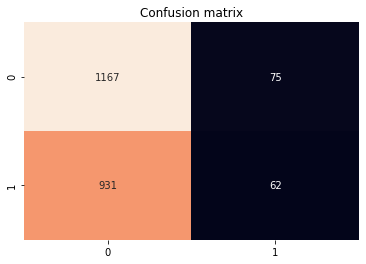

In [56]:
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))
labels = clf.classes_
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [36]:
new_test[0]['passage']['text']

'"(1) Издательство Viking Press совместно с компанией TradeMobile выпустят мобильное приложение, посвященное Анне Франк, передает The Daily Telegraph. (2) Программа будет включать в себя фрагменты из дневника Анны, озвученные британской актрисой Хеленой Бонэм Картер. (3) Помимо этого, в приложение войдут фотографии и видеозаписи, документы из архива Фонда Анны Франк, план здания в Амстердаме, где Анна с семьей скрывались от нацистов, и факсимильные копии страниц дневника. (4) Приложение, которое получит название Anne Frank App, выйдет 18 октября. (5) Интерфейс программы будет англоязычным. (6) На каких платформах будет доступно Anne Frank App, не уточняется. Анна Франк родилась в Германии в 1929 году. (7) Когда в стране начались гонения на евреев, Анна с семьей перебрались в Нидерланды. (8) С 1942 года члены семьи Франк и еще несколько человек скрывались от нацистов в потайных комнатах дома в Амстердаме, который занимала компания отца Анны. (9) В 1944 году группу по доносу обнаружили г

In [38]:
new_test[0]['passage']['questions'][0]['question']

'О чем дневник Анны Франк?'

In [40]:
new_test[0]['passage']['questions'][0]['answers'][0]['text']

'Дневник об отметках Анны.'

In [47]:
def get_answer(dic, question, text, clf=clf):
  answer = dic['text']
  full_text = text+' Query: '+question+' Answer: '+answer
  dic['label'] = int(clf.predict([full_text])[0])
  return dic

In [42]:
new_test[0]['passage']['questions'][0]['answers'][0]

{'idx': 0, 'label': 1, 'text': 'Дневник об отметках Анны.'}

In [43]:
dic = new_test[0]['passage']['questions'][0]['answers'][0]
question = new_test[0]['passage']['questions'][0]['question']
text = new_test[0]['passage']['text']
get_answer(dic, question, text, clf=clf)

{'idx': 0, 'label': 1, 'text': 'Дневник об отметках Анны.'}

In [59]:
dic = new_test[0]['passage']['questions'][0]['answers'][0]
question = new_test[0]['passage']['questions'][0]['question']
text = new_test[0]['passage']['text']
answer = dic['text']
full_text = text+' Query: '+question+' Answer: '+answer
clf.predict_proba([full_text])[0][1]

0.4382412041676226

In [60]:
import numpy as np
np.argmax([1,2,0])

1

In [61]:
def range_answers(dic_list, question, text, clf=clf):
  answers = [dic['text'] for dic in dic_list]
  probas = []
  for a in answers:
      full_text = text+' Query: '+question+' Answer: '+answer
      probas.append(clf.predict_proba([full_text])[0][1])
  correct_answer = np.argmax(probas)
  for i  in range(len(dic_list)):
      if i==correct_answer:
          dic_list[i]['label'] = 1
      else:
          dic_list[i]['label'] = 0
  return dic_list

In [48]:
for i in tqdm(range(len(new_test))):
    q = new_test[i]['passage']['questions']
    text = new_test[i]['passage']['text']
    for j in range(len(q)):
        question = q[j]['question']
        q[j]['answers'] = [get_answer(dic, question, text) for dic in q[j]['answers'] ]
    new_test[i]['passage']['questions'] = q

100%|██████████| 322/322 [00:10<00:00, 30.55it/s]


In [49]:
new_test[0]

{'idx': 0,
 'passage': {'questions': [{'answers': [{'idx': 0,
      'label': 1,
      'text': 'Дневник об отметках Анны.'},
     {'idx': 1, 'label': 1, 'text': 'Дневник о школьных годах девочки Анны.'},
     {'idx': 2,
      'label': 1,
      'text': 'О жизни еврейской девочки во время гонения евреев нацистами.'},
     {'idx': 3,
      'label': 1,
      'text': 'Анна описывала свою жизнь и жизнь близких, когда скрывалась от нацистов.'}],
    'idx': 0,
    'question': 'О чем дневник Анны Франк?'},
   {'answers': [{'idx': 4, 'label': 1, 'text': 'Приложение будет платным.'},
     {'idx': 5, 'label': 1, 'text': 'Приложение будет англоязычным.'},
     {'idx': 6, 'label': 1, 'text': 'Приложение будет на еврейском языке.'},
     {'idx': 7,
      'label': 1,
      'text': 'Приложение будет посвящено Анне Франк и основано на записях в её дневнике.'}],
    'idx': 1,
    'question': 'Каким будет приложение Anne Frank App?'},
   {'answers': [{'idx': 8, 'label': 1, 'text': 'Карта Нидерландов.'},
  

In [ ]:
predictions = clf.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.40
Accuracy:   0.55
              precision    recall  f1-score   support

           0       0.56      0.94      0.70      1242
           1       0.45      0.06      0.11       993

    accuracy                           0.55      2235
   macro avg       0.50      0.50      0.40      2235
weighted avg       0.51      0.55      0.44      2235



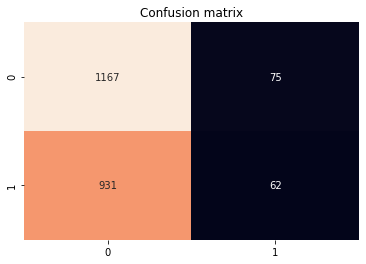

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Precision:   0.52
Recall:   0.51
F1-measure:   0.50
Accuracy:   0.50
              precision    recall  f1-score   support

           0       0.57      0.42      0.48      1242
           1       0.46      0.61      0.52       993

    accuracy                           0.50      2235
   macro avg       0.52      0.51      0.50      2235
weighted avg       0.52      0.50      0.50      2235



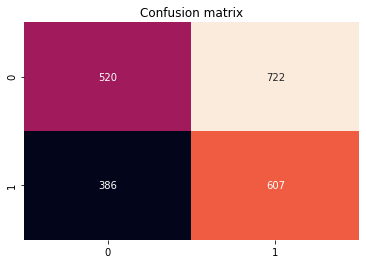

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Precision:   0.53
Recall:   0.50
F1-measure:   0.36
Accuracy:   0.56
              precision    recall  f1-score   support

           0       0.56      1.00      0.71      1242
           1       0.50      0.00      0.00       993

    accuracy                           0.56      2235
   macro avg       0.53      0.50      0.36      2235
weighted avg       0.53      0.56      0.40      2235



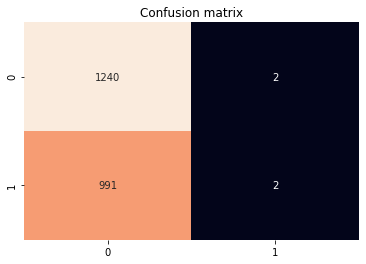

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.28
Recall:   0.50
F1-measure:   0.36
Accuracy:   0.56
              precision    recall  f1-score   support

           0       0.56      1.00      0.71      1242
           1       0.00      0.00      0.00       993

    accuracy                           0.56      2235
   macro avg       0.28      0.50      0.36      2235
weighted avg       0.31      0.56      0.40      2235



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


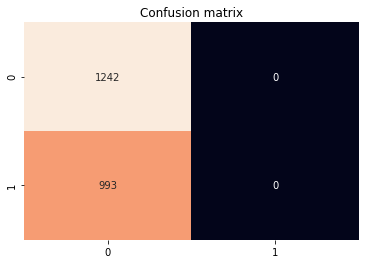

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.51
              precision    recall  f1-score   support

           0       0.56      0.54      0.55      1242
           1       0.45      0.46      0.45       993

    accuracy                           0.51      2235
   macro avg       0.50      0.50      0.50      2235
weighted avg       0.51      0.51      0.51      2235



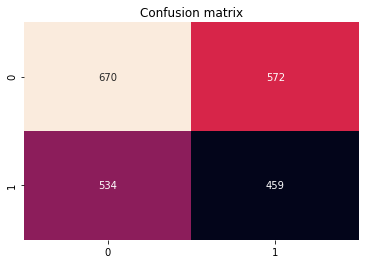

In [ ]:
for classif in clflist:
    clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3), analyzer='word', max_features=10000)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    #('reducer', TruncatedSVD(n_components=Val3)),
    ('clf', classif),
    ])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print(classif)
    print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))
    labels = clf.classes_
    sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix")
    plt.show()

## Место для ваших экспериментов

*   Что будет, если попробовать другие настройки tf-idf, другое количество признаков?
*   Почему бы не использовать вектора word2vec для текстов? [Пример](http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/) 
*   Подумайте, какие ограничения есть у линейных моделей, в которые мы передаем один вектор на все: текст, вопрос, ответ
*   Предложите свои методики проверки соответствия ответа содержанию текста [Пример1](http://docs.deeppavlov.ai/en/0.0.6.5/components/tfidf_ranking.html) [Пример2](https://medium.com/deeppavlov/open-domain-question-answering-with-deeppavlov-c665d2ee4d65)



## Попробуем BERT

Перезапустите среду выполнения! И тут лучше переключиться на GPU!

Установите все библиотеки ниже, и затем заново загрузите данные, импортируйте sklearn - так вы избежите конфликта версий

In [ ]:
!pip install transformers
!pip install tensorboardx
!pip install simpletransformers

     |████████████████████████████████| 1.3MB 7.4MB/s 
     |████████████████████████████████| 890kB 38.0MB/s 
     |████████████████████████████████| 1.1MB 44.7MB/s 
     |████████████████████████████████| 2.9MB 51.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=fbabc76fd9c3695c855c97a718e881e8ec0a45688446ffdb1c00d65fe2e0919d
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 317kB 9.0MB/s 
     |████████████████████████████████| 225kB 8.1MB/s 
     |████████████████████████████████| 71kB 5.4MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 1.8MB 12.5MB/s 
     |████████████████████████████████| 7.4MB 37.4MB/s 
     |████████████████████████████████| 102kB 14.0MB/s 
     |████████████████████████████████| 163kB 58.2MB/s 
     |███████████████████████████████

In [ ]:
train_df = pd.DataFrame({
    'text': X_train,
    'label':y_train
})

print(train_df.head())

eval_df = pd.DataFrame({
    'text': X_test,
    'label': y_test
})

print(eval_df.head())

                                                text  label
0  (1) Но люди не могут существовать без природы,...      1
1  (1) Но люди не могут существовать без природы,...      0
2  (1) Но люди не могут существовать без природы,...      0
3  (1) Но люди не могут существовать без природы,...      1
4  (1) Но люди не могут существовать без природы,...      0
                                                text  label
0  (1) Самый первый «остров» Архипелага возник в ...      1
1  (1) Самый первый «остров» Архипелага возник в ...      0
2  (1) Самый первый «остров» Архипелага возник в ...      0
3  (1) Самый первый «остров» Архипелага возник в ...      0
4  (1) Самый первый «остров» Архипелага возник в ...      1


In [ ]:
from simpletransformers.classification import ClassificationModel

In [ ]:
# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-multilingual-uncased',use_cuda=False)

# Train the model
model.train_model(train_df)

# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:380: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [ ]:
predictions, raw_outputs = model.predict(X_test)

In [ ]:
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)

## Что еще можно улучшить?

Ограничение модели BERT - обработка только первых 512 токенов текста

Нам это не очень подходит - если обрезать тексты по 512 слову, как это происходит в simple transformers, но мы можем обрезать и вопрос, и ответ! Тогда наш классификатор не сможет научиться различать неправильные ответы.

Обрежем тексты по началу, а не по концу:

In [ ]:
def text_splitter(text, amount=500): 
    tokens = text.split(' ')
    new_text = ' '.join(tokens[-amount:])
    return new_text

def get_X_y_for_bert(data_json_file):
    X, y = [], []
    with open(data_json_file, 'r') as json_file:
        json_list = list(json_file)
        #print(json_list[0])
        for json_str in json_list:
            item = json.loads(json_str)
            text = item['passage']['text']
            questions = item['passage']['questions']
            for q in questions:
                query = q['question']
                ans = q['answers']
                for a in ans:
                    X.append(text_splitter(text+' Query: '+query+' Answer: '+a['text']))
                    y.append(a['label'])
    return X, y


## Еще идеи:



*   больше эпох обучения
*   попробовать другие модели для классификации документов из simple transformers - только мультиязычные! См [документацию](https://simpletransformers.ai/docs/classification-models/) 



## Косинусная мера - простой вариант


In [63]:
!pip install nltk


In [66]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [67]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
# X = input("Enter first string: ").lower() 
# Y = input("Enter second string: ").lower() 
X ="I love horror movies"
Y ="Lights out is a horror movie"
  
# tokenization 
X_list = word_tokenize(X)  
Y_list = word_tokenize(Y) 
  
# sw contains the list of stopwords 
sw = stopwords.words('english')  
l1 =[];l2 =[] 
  
# remove stop words from the string 
X_set = {w for w in X_list if not w in sw}  
Y_set = {w for w in Y_list if not w in sw} 
  
# form a set containing keywords of both strings  
rvector = X_set.union(Y_set)  
for w in rvector: 
    if w in X_set: l1.append(1) # create a vector 
    else: l1.append(0) 
    if w in Y_set: l2.append(1) 
    else: l2.append(0) 
c = 0
  
# cosine formula  
for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
cosine = c / float((sum(l1)*sum(l2))**0.5) 
print("similarity: ", cosine) 

similarity:  0.2886751345948129
